# 现值

## 概述

本讲座描述了**现值模型**，这是许多资产定价理论的起点。

资产定价理论是关于许多经济决策理论的组成部分，包括

  * 消费
  * 劳动力供给
  * 教育选择
  * 货币需求

在资产定价理论中，更广泛的经济动态中，一个基本主题是不同**时间序列**之间的关系。

**时间序列**是按时间索引的**序列**。

在本讲座中，我们将把序列表示为向量。

因此，我们的分析通常归结为研究向量之间的关系。

本讲座中的主要工具将是

  * 矩阵乘法，和
  * 矩阵求逆。

我们将在后续讲座中使用这里描述的计算，包括{doc}`消费平滑 <cons_smooth>`，{doc}`均衡差异模型 <equalizing_difference>`，和{doc}`货币主义价格水平理论 <cagan_ree>`。

让我们开始吧。


## 分析

设

 * $\{d_t\}_{t=0}^T $ 是一系列股息或“支付”
 * $\{p_t\}_{t=0}^T $ 是从$t$日期开始的资产支付流的延续索赔价格序列，即$\{d_s\}_{s=t}^T $
 * $ \delta  \in (0,1) $ 是一个周期的“折现因子”
 * $p_{T+1}^*$ 是时间$T+1$时资产的终端价格

我们假设股息流$\{d_t\}_{t=0}^T $和终端价格$p_{T+1}^*$都是外生的。

这意味着它们是在模型之外确定的。

假设资产定价方程序列

$$
    p_t = d_t + \delta p_{t+1}, \quad t = 0, 1, \ldots , T
$$ (eq:Euler1)

我们说方程**s**，复数，因为有$T+1$个方程，每个$t =0, 1, \ldots, T$都有一个。

方程{eq}`eq:Euler1`断言在时间$t$购买资产所支付的价格等于支付$d_t$加上时间$t+1$的价格乘以时间折现因子$\delta$。

通过将明天的价格乘以$\delta$来折现，考虑了“等待一个周期的价值”。

我们想要解决$T+1$个方程{eq}`eq:Euler1`的系统，以资产价格序列$\{p_t\}_{t=0}^T $作为股息序列$\{d_t\}_{t=0}^T $和外生终端价格$p_{T+1}^*$的函数。

像{eq}`eq:Euler1`这样的方程系统是线性**差分方程**的一个例子。

有强大的数学方法可以用来解决这样的系统，它们本身就值得研究，因为它们是分析许多有趣经济模型的基础。

例如，参见{doc}`Samuelson乘数-加速器 <dynam:samuelson>`

在本讲座中，我们将使用矩阵乘法和矩阵求逆来解决系统{eq}`eq:Euler1`，这是线性代数中的基本工具，在{doc}`线性方程和矩阵代数 <linear_equations>`中介绍。

我们将导入以下的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

## 将序列表示为向量

系统{eq}`eq:Euler1`中的方程可以如下排列：

$$
\begin{aligned}
    p_0 & = d_0 + \delta p_1 \\
    p_1 & = d_1 + \delta p_2 \\
    \vdots \\
    p_{T-1} & = d_{T-1} + \delta p_T \\
    p_T & = d_T + \delta p^*_{T+1}
\end{aligned}
$$ (eq:Euler_stack)

将$T+1$个资产定价方程的系统{eq}`eq:Euler_stack`写成单个矩阵方程

$$
    \begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                    0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                    0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                    \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                    0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                    0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
    \begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
    \end{bmatrix} 
    =  \begin{bmatrix}  
    d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
    \end{bmatrix}
    + \begin{bmatrix} 
    0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
    \end{bmatrix}
$$ (eq:pvpieq)

```{exercise-start} 
:label: pv_ex_1
```

手动用矩阵乘法对[](eq:pvpieq)进行计算，然后用 [](eq:Euler_stack)确认。

```{exercise-end}
```

用向量-矩阵表示法，我们可以将系统{eq}`eq:pvpieq`写成

$$
    A p = d + b
$$ (eq:apdb)

这里$A$是方程{eq}`eq:pvpieq`左侧的矩阵，而

$$
    p = 
    \begin{bmatrix}
        p_0 \\
        p_1 \\
        \vdots \\
        p_T
    \end{bmatrix},
    \quad
    d = 
    \begin{bmatrix}
        d_0 \\
        d_1 \\
        \vdots \\
        d_T
    \end{bmatrix},
    \quad \text{and} \quad
    b = 
    \begin{bmatrix}
        0 \\
        0 \\
        \vdots \\
        p^*_{T+1}
    \end{bmatrix}
$$

价格向量的解是

$$
    p = A^{-1}(d + b)
$$ (eq:apdb_sol)

例如，假设股息流是

$$
    d_{t+1} = 1.05 d_t, \quad t = 0, 1, \ldots , T-1.
$$

让我们编写Python代码来计算和绘制股息流。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


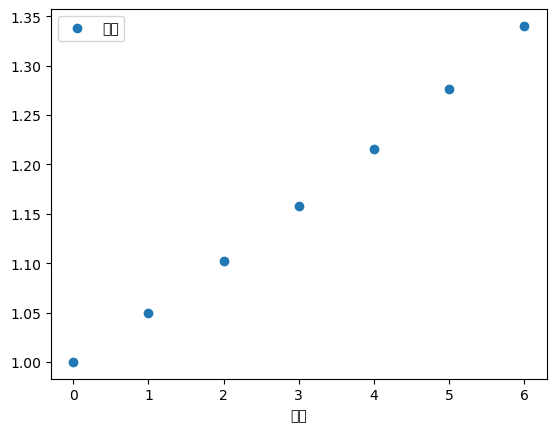

In [2]:
T = 6
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.05 

fig, ax = plt.subplots()
ax.plot(d, 'o', label='股息')
ax.legend()
ax.set_xlabel('时间')
plt.show()

现在让我们来计算和绘制资产价格。

我们将 $\delta$ 和 $p_{T+1}^*$ 设定为

In [3]:
δ = 0.99
p_star = 10.0

让我们来建立矩阵 $A$

In [4]:
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ


让我们来一起检视$A$

In [5]:
A

array([[ 1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

让我们用 {eq}`eq:apdb_sol`来求解价格。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


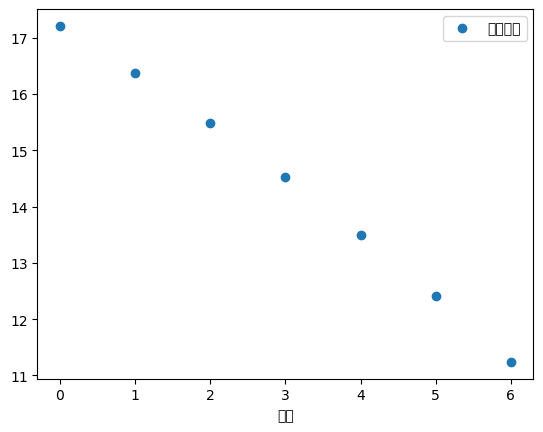

In [6]:
b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)
fig, ax = plt.subplots()
ax.plot(p, 'o', label='资产价格')
ax.legend()
ax.set_xlabel('时间')
plt.show()

现在让我们来看一个周期性增长的股息序列：

$$
    d_{t+1} = 1.01 d_t + 0.1 \sin t, \quad t = 0, 1, \ldots , T-1.
$$

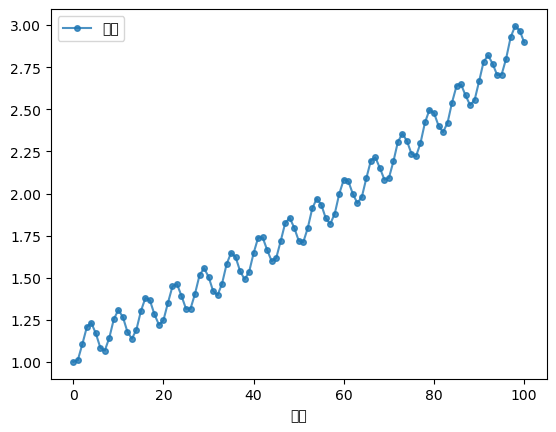

In [7]:
T = 100
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.01 + 0.1 * np.sin(t)

fig, ax = plt.subplots()
ax.plot(d, 'o-', ms=4, alpha=0.8, label='股息')
ax.legend()
ax.set_xlabel('时间')
plt.show()

```{exercise-start} 
:label: pv_ex_cyc
```
当$p^*_{T+1} = 0$ 和 $\delta = 0.98$ 时，计算相对应的价格序列。
```{exercise-end}
```

```{solution-start} pv_ex_cyc
:class: dropdown
```
我们改变之前的参数和矩阵$A$。

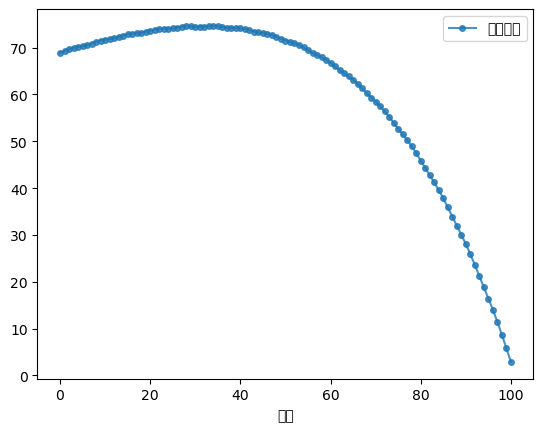

In [8]:
δ = 0.98
p_star = 0.0
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ

b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)
fig, ax = plt.subplots()
ax.plot(p, 'o-', ms=4, alpha=0.8, label='资产价格')
ax.legend()
ax.set_xlabel('时间')
plt.show()


与现值计算相关的加权平均在很大程度上消除了周期。

```{solution-end} 
```

## 解析表达式

根据逆矩阵定理，当$A B$是单位矩阵时，矩阵$B$是$A$的逆矩阵。

可以验证，{eq}`eq:pvpieq`中的矩阵$A$的逆矩阵是

$$ A^{-1} = 
    \begin{bmatrix}
        1 & \delta & \delta^2 & \cdots & \delta^{T-1} & \delta^T \cr
        0 & 1 & \delta & \cdots & \delta^{T-2} & \delta^{T-1} \cr
        \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
        0 & 0 & 0 & \cdots & 1  & \delta \cr
        0 & 0 & 0 & \cdots & 0 & 1 \cr
    \end{bmatrix}
$$ (eq:Ainv)

```{exercise-start} 
:label: pv_ex_2
```

通过证明$AA^{-1}$为单位矩阵来检查。


```{exercise-end}
```

如果我们在 {eq}`eq:apdb_sol` 中使用表达式 {eq}`eq:Ainv` 并执行所指示的矩阵乘法，我们将发现

$$
    p_t =  \sum_{s=t}^T \delta^{s-t} d_s +  \delta^{T+1-t} p_{T+1}^*
$$ (eq:ptpveq)

定价公式 {eq}`eq:ptpveq` 断言两个组成部分相加得到资产价格 $p_t$：

* 一个**基本组成部分** $\sum_{s=t}^T \delta^{s-t} d_s$，等于预期股息的**贴现现值**
  
* 一个**泡沫组成部分** $\delta^{T+1-t} p_{T+1}^*$

基本组成部分由贴现因子 $\delta$ 和资产的支付（在这种情况下为股息）确定。
泡沫组成部分是价格中不由基本面决定的部分。
有时将泡沫组成部分重写为
$$ 
c \delta^{-t}
$$
更为方便，其中
$$ 
c \equiv \delta^{T+1}p_{T+1}^*
$$

## 关于泡沫的更多内容

让我们暂时关注一种特殊情况，即一种永不支付股息的资产，在这种情况下

$$
\begin{bmatrix}  
d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
\end{bmatrix} = 
\begin{bmatrix}  
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix}
$$

在这种情况下，我们的 $T+1$ 资产定价方程系统 {eq}`eq:Euler1` 采用以下单一矩阵方程的形式：

$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
\begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
\end{bmatrix}  =
\begin{bmatrix} 
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
\end{bmatrix}
$$ (eq:pieq2)

显然，如果 $p_{T+1}^* = 0$，一个所有元素为零的价格向量 $p$ 可以解这个方程，此时我们定价公式 {eq}`eq:ptpveq` 中只有**基本面**成分存在。

但让我们通过设置以下条件来激活**泡沫**成分：

$$
p_{T+1}^* = c \delta^{-(T+1)} 
$$ (eq:eqbubbleterm)

其中 $c$ 为某个正常数。

在这种情况下，当我们用方程 {eq}`eq:Ainv` 中的矩阵 $A^{-1}$ 乘以 {eq}`eq:pieq2` 的两边时，我们发现：

$$
p_t = c \delta^{-t}
$$ (eq:bubble)

## 总回报率

定义从 $t$ 期到 $t+1$ 期持有资产的总回报率为：

$$
R_t = \frac{p_{t+1}}{p_t}
$$ (eq:rateofreturn)

将方程 {eq}`eq:bubble` 代入方程 {eq}`eq:rateofreturn` 可以确认，一个价值完全来源于泡沫的资产的总回报率为：

$$
R_t = \delta^{-1} > 1 , t = 0, 1, \ldots, T
$$

## 练习


```{exercise-start} 
:label: pv_ex_a
```
给出以下 $d$ 和 $p_{T+1}^*$ 设置下资产价格 $p_t$ 的分析表达式：

1. $p_{T+1}^* = 0, d_t = g^t d_0$（戈登增长公式的修改版）
2. $p_{T+1}^* = g^{T+1} d_0, d_t = g^t d_0$（普通的戈登增长公式）
3. $p_{T+1}^* = 0, d_t = 0$（一个无价值股票的价格）
4. $p_{T+1}^* = c \delta^{-(T+1)}, d_t = 0$（一个纯泡沫股票的价格）

```{exercise-end} 
```

```{solution-start} pv_ex_a
:class: dropdown
```
将上述每对 $p_{T+1}^*, d_t$ 代入方程 {eq}`eq:ptpveq` 得到：

1. $p_t = \sum^T_{s=t} \delta^{s-t} g^s d_0$
2. $p_t = \sum^T_{s=t} \delta^{s-t} g^s d_0 + \delta^{T+1-t} g^{T+1} d_0$
3. $p_t = 0$
4. $p_t = c \delta^{-t}$


```{solution-end}
```